In [63]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
!pip install imblearn

In [3]:
# import neccessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [5]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])

No. of Rows : 891
No. of Columns : 12


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

Data set contains 891 rows and 12 columns
null values are also present in a few of the features
The outcome prediction is prediction of survival, hense it is a classification problem
there are mixed data types in features/labels  like int,float and objects also

In [8]:
#Finding to check if any missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

There are lot of missing values in Cabin as well as Age, and a few in Age, cabin missing value is more than 50%, so it is better to delete the feature, as it has les contribution for the prediction

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#Target Variable has two categories

Pclass is of 3 categories

sex is of 2 categories

SibSp and Parch has 7 descrete value each

Embarked also has 3 descrete values



In [11]:
#dropping Feature Cabin as it has lot of null values
df.drop(columns=['Cabin'],inplace = True)

In [12]:
#Data distribution in label

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

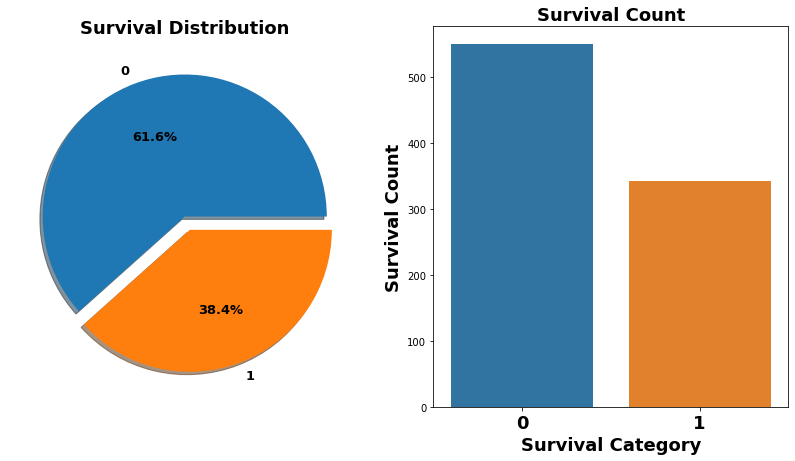

In [13]:
#survival distribution

f,ax=plt.subplots(1,2,figsize=(14,7))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],textprops ={ 'fontsize':13,'fontweight' :'bold'},
                                       autopct='%2.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survival Distribution',fontsize=18,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survival Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Survival Category",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Survival Count", fontsize= 18, fontweight='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

In [14]:
#Survival rate is less compared to fatality

In [15]:
#now we will remove the Name PassengerID coloumn from our data set
df=df.drop('Name',axis=1)
df.drop('PassengerId',axis=1,inplace=True)

In [16]:
#Age has 177 missing values need to handle, lets fill using the mean method fill

 
df['Age']=df['Age'].fillna(df['Age'].mean())

In [17]:
# mode filling na for embarked
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [18]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## Data Visualization

3    491
1    216
2    184
Name: Pclass, dtype: int64


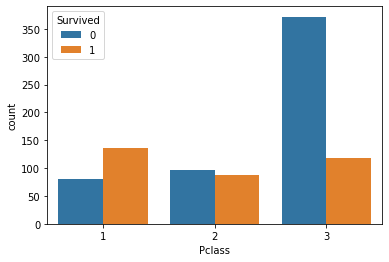

In [19]:
#Pclass and Survival
print(df["Pclass"].value_counts())
sns.countplot('Pclass',data=df,hue='Survived')
plt.show()

Pclass 3 has more death rate, Pclass 1 has least death rate, and Pclass 2 has average survival rate

male      577
female    314
Name: Sex, dtype: int64


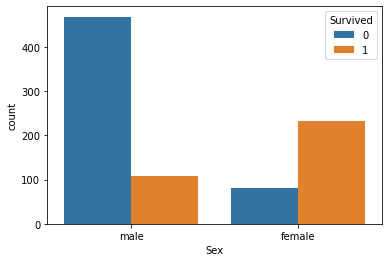

In [20]:
# Sex V/S survived
print(df["Sex"].value_counts())
sns.countplot('Sex',data=df,hue='Survived')
plt.show()

More male passangers survived than female passangers

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


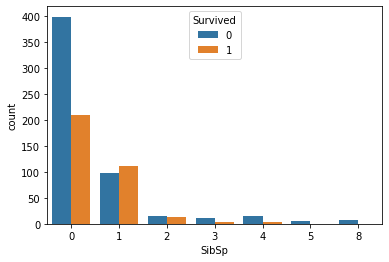

In [21]:
print(df["SibSp"].value_counts())
sns.countplot('SibSp',data=df,hue='Survived')
plt.show()

More death when no siblings or co passangers, when one sibling passanger the survival is moderate

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


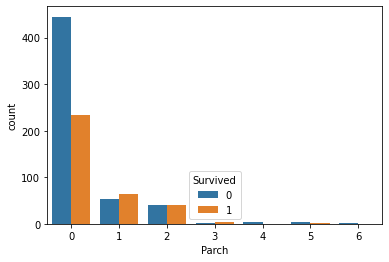

In [22]:
#Parch plotting 
print(df["Parch"].value_counts())
sns.countplot('Parch',data=df,hue='Survived')
plt.show()

#Parch count on survivl and death -  more death for Parch is zero

S    646
C    168
Q     77
Name: Embarked, dtype: int64


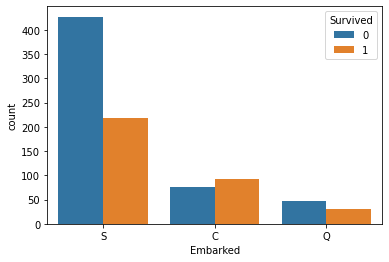

In [23]:
#Embarked

print(df["Embarked"].value_counts())
sns.countplot('Embarked',data=df,hue='Survived')
plt.show()

Southampton has high survival rate and more mortality too, Cherbourg has low mortality and Queenstown has also high mortality

## Encoding

In [24]:
# Now we will encode Sex, Embarked and cabin  using label encoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,0,35.0,1,0,113803,53.1000,2
4,0,3,1,35.0,0,0,373450,8.0500,2


In [26]:
#Dropping ticket also as it is irrelavant
df.drop(["Ticket" ],axis=1,inplace=True)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Correlation



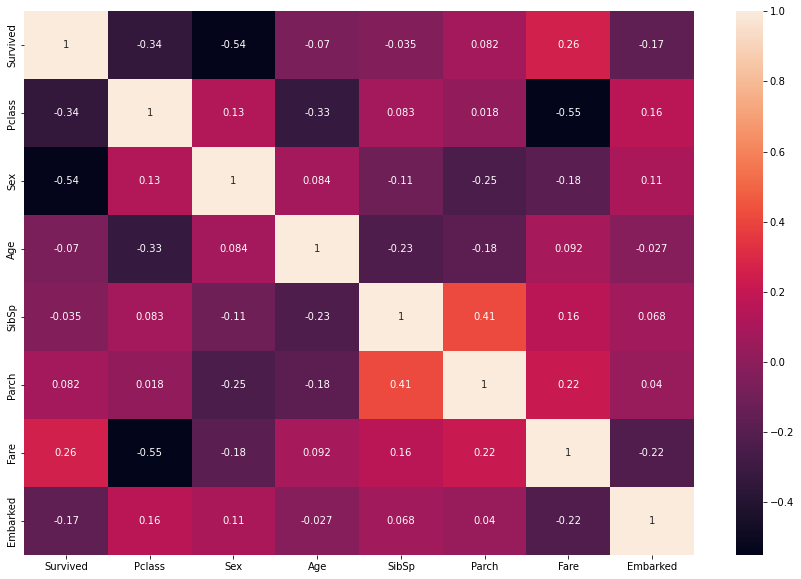

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Observed No much correlation between features

## Skewness Check

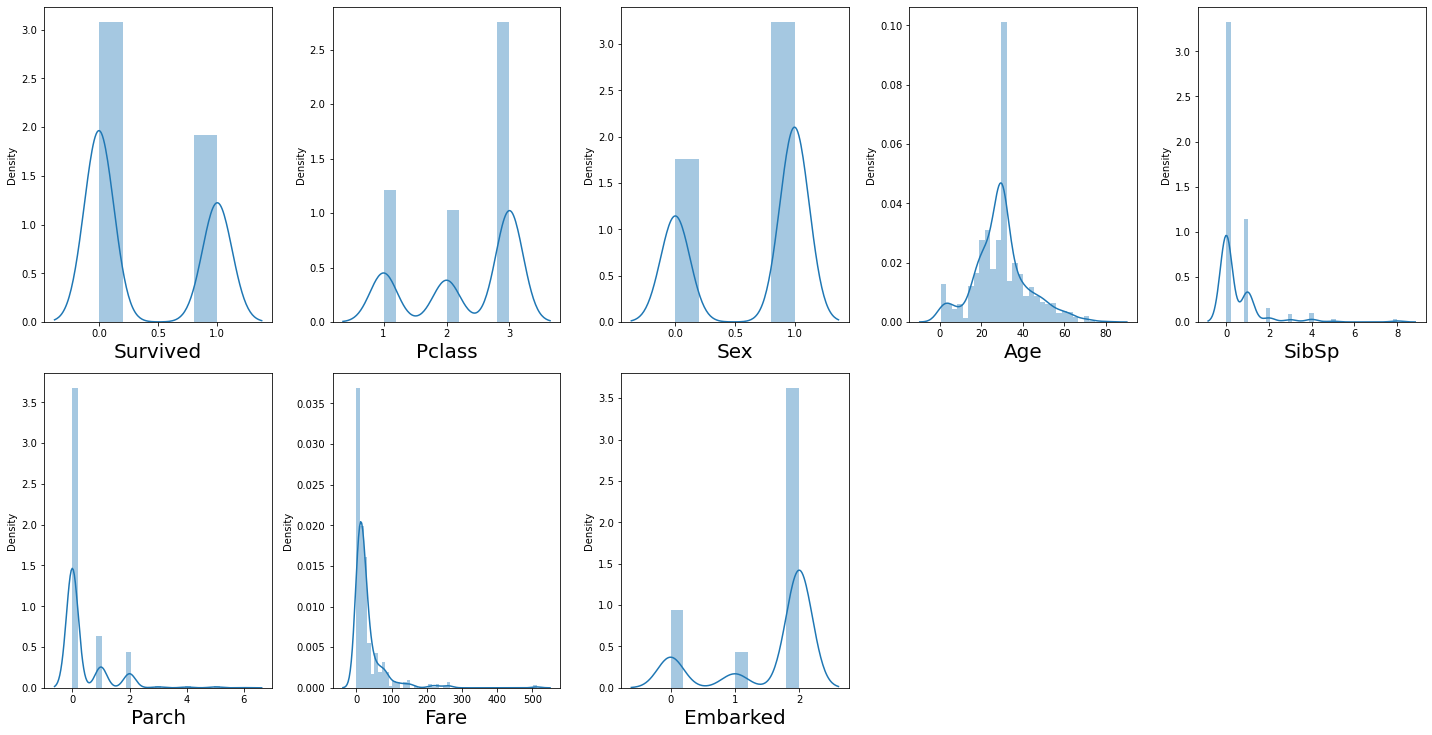

In [29]:
plt.figure(figsize=(20,25))
plotnum = 1
for col in df:
    if plotnum<=9:
        plt.subplot(5,5,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

from this we can identify some skewness are presnt in Sibsp, Parch, and Fare and Embarked

In [30]:
#checking the Skewness
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [31]:
hi_sw=['SibSp','Parch','Fare','Embarked']
skew_df=df[hi_sw].copy()
skew_df.skew()

SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

Will Apply log and power transform to reduce the skewness of the above features

In [32]:
from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer()
sk=pw.fit_transform(skew_df)
sk=pd.DataFrame(sk,columns=skew_df.columns)
sk.skew()

SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked   -1.064527
dtype: float64

Skewness reduced but, still not in the acceptable range further needs to be reduced

In [33]:
new_df=df.copy()
new_df[hi_sw]=sk[hi_sw].copy()
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.373636,-0.560253,-0.878820,0.610411
1,1,1,0,38.0,1.373636,-0.560253,1.336651,-1.780520
2,1,3,0,26.0,-0.679850,-0.560253,-0.790065,0.610411
3,1,1,0,35.0,1.373636,-0.560253,1.067352,0.610411
4,0,3,1,35.0,-0.679850,-0.560253,-0.774439,0.610411


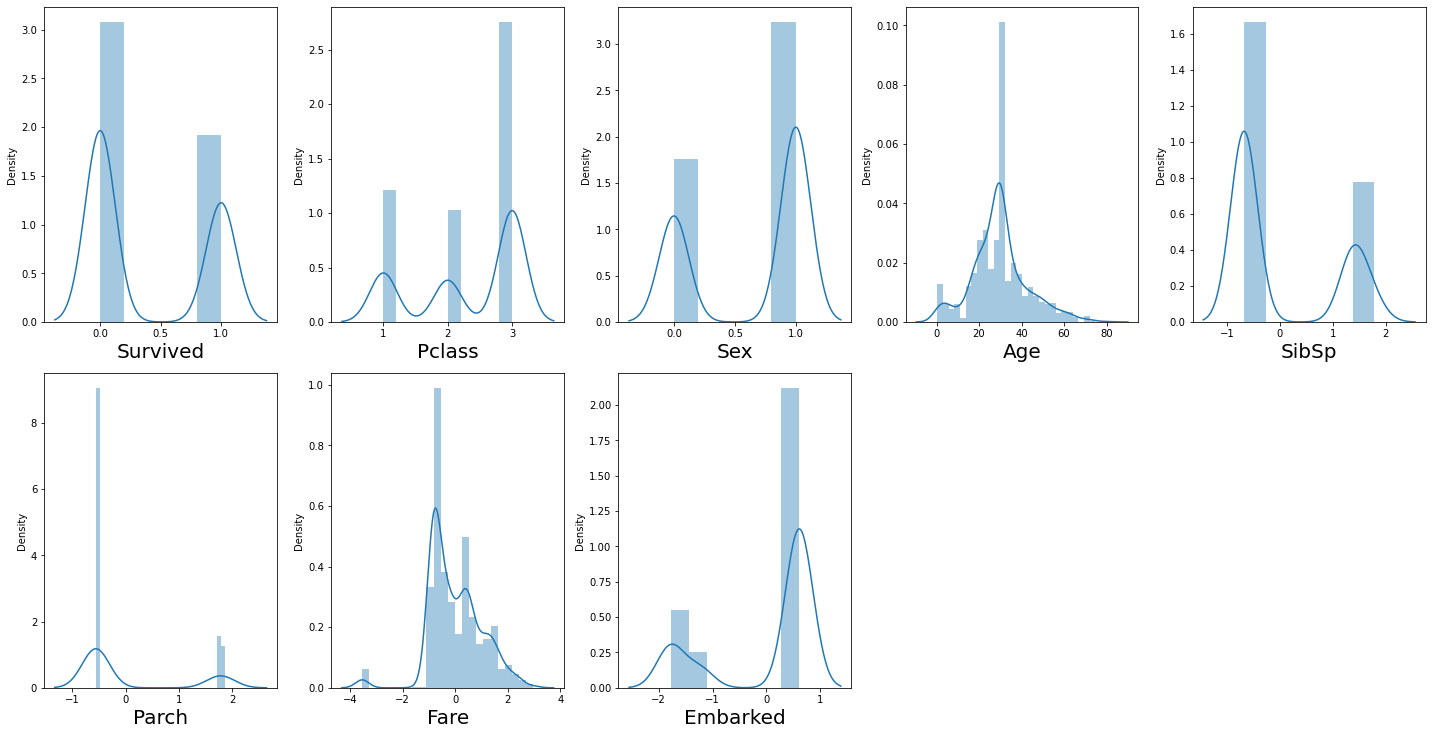

In [34]:
plt.figure(figsize=(20,25))
plotnum = 1
for col in new_df:
    if plotnum<=9:
        plt.subplot(5,5,plotnum)
        sns.distplot(new_df[col])
        plt.xlabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

#Still skewness is present we need to reduce the skewness further 

In [35]:
#now Seperate the data in to features and label
x=new_df.drop('Survived',axis=1)
y=new_df['Survived']

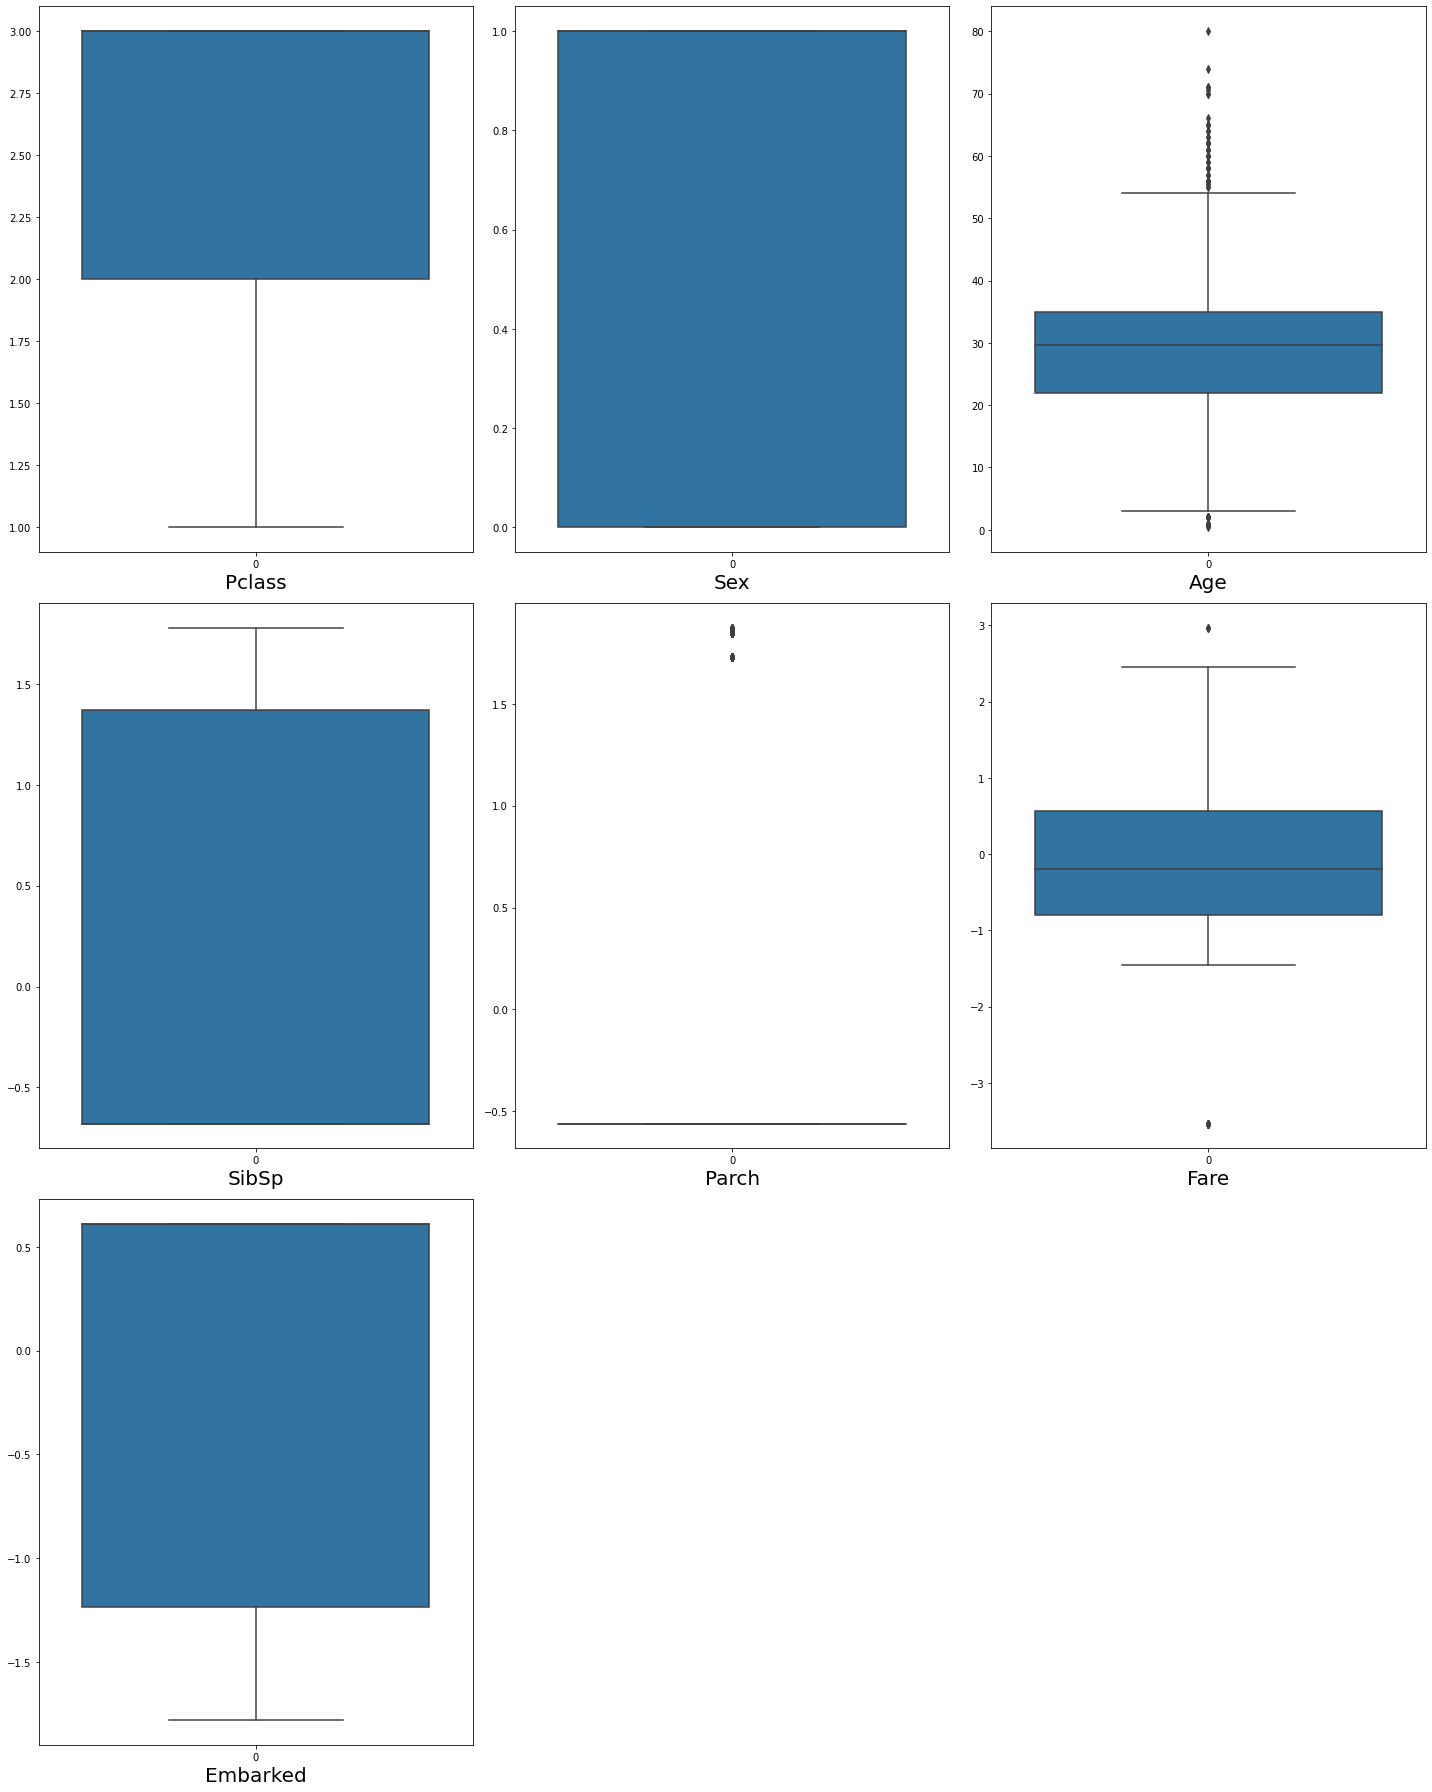

In [36]:
# find the outliers
plt.figure(figsize=(20,25))
plotnum = 1
for col in x:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.boxplot(data=x[col])
        plt.xlabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

'more outliers in age, some in parch and some in fare too

Outliers can be removed by Z transform

In [37]:


from scipy.stats import  zscore
z=np.abs(zscore(x))
z

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,0.592481,1.373636,0.560253,0.878820,0.610411
1,1.566107,1.355574,0.638789,1.373636,0.560253,1.336651,1.780520
2,0.827377,1.355574,0.284663,0.679850,0.560253,0.790065,0.610411
3,1.566107,1.355574,0.407926,1.373636,0.560253,1.067352,0.610411
4,0.827377,0.737695,0.407926,0.679850,0.560253,0.774439,0.610411
...,...,...,...,...,...,...,...
886,0.369365,0.737695,0.207709,0.679850,0.560253,0.294907,0.610411
887,1.566107,1.355574,0.823344,0.679850,0.560253,0.527906,0.610411
888,0.827377,1.355574,0.000000,1.373636,1.846856,0.288885,0.610411
889,1.566107,0.737695,0.284663,0.679850,0.560253,0.527906,1.780520


In [38]:
x = x[(z <3).all(axis=1)] #taking threshold value as 3
print(x.shape)
y=y[(z<3).all(axis=1)]
print(y.shape)

(869, 7)
(869,)


In [39]:
# Now we will make or data set balance using smote
#from imblearn.over_sampling import SMOTE
# some versioning issue for smote- skipping the phase
# Now we will make or data set balance using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)

## Standardize the Data using Standard Scalar

In [40]:
sd=StandardScaler()
x_scalled=pd.DataFrame(sd.fit_transform(x),columns=x.columns)
x_scalled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.906295,0.887222,-0.560142,1.352219,-0.594448,-1.112534,0.648884
1,-1.440975,-1.127114,0.698683,1.352219,-0.594448,1.338301,-1.693208
2,0.906295,-1.127114,-0.245436,-0.708094,-0.594448,-1.014349,0.648884
3,-1.440975,-1.127114,0.462654,1.352219,-0.594448,1.040394,0.648884
4,0.906295,0.887222,0.462654,-0.708094,-0.594448,-0.997063,0.648884
...,...,...,...,...,...,...,...
1053,-0.267340,0.887222,-2.083655,1.352219,1.657733,0.065193,0.648884
1054,-0.267340,-1.127114,-0.874848,-0.708094,1.772215,-0.470538,0.648884
1055,-0.267340,-1.127114,0.217033,-0.708094,-0.594448,-0.521049,0.648884
1056,-1.440975,-1.127114,-0.334936,1.352219,-0.594448,1.133177,-1.693208


In [41]:
#Modelling

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    pred = dtc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8584905660377359  on Random_state  53


In [43]:
# Train test split using the Random state

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=53)

In [44]:
#import all other algorithms and find the best one
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
#Decesion Tree
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.8364779874213837
[[133  26]
 [ 26 133]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       159
           1       0.84      0.84      0.84       159

    accuracy                           0.84       318
   macro avg       0.84      0.84      0.84       318
weighted avg       0.84      0.84      0.84       318



In [46]:
#random Forest

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.8301886792452831
[[134  25]
 [ 29 130]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       159
           1       0.84      0.82      0.83       159

    accuracy                           0.83       318
   macro avg       0.83      0.83      0.83       318
weighted avg       0.83      0.83      0.83       318



In [47]:
#SVC

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.7232704402515723
[[129  30]
 [ 58 101]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       159
           1       0.77      0.64      0.70       159

    accuracy                           0.72       318
   macro avg       0.73      0.72      0.72       318
weighted avg       0.73      0.72      0.72       318



In [48]:
#Logistic Regression

lr=LogisticRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.7767295597484277
[[121  38]
 [ 33 126]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       159
           1       0.77      0.79      0.78       159

    accuracy                           0.78       318
   macro avg       0.78      0.78      0.78       318
weighted avg       0.78      0.78      0.78       318



In [49]:
#KNN

knn=KNN()
knn.fit(x_train,y_train)
knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.7767295597484277
[[121  38]
 [ 33 126]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       159
           1       0.77      0.79      0.78       159

    accuracy                           0.78       318
   macro avg       0.78      0.78      0.78       318
weighted avg       0.78      0.78      0.78       318



In [50]:
#GBoosting

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.8333333333333334
[[135  24]
 [ 29 130]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       159
           1       0.84      0.82      0.83       159

    accuracy                           0.83       318
   macro avg       0.83      0.83      0.83       318
weighted avg       0.83      0.83      0.83       318



In [51]:
#  cross validation scores for each model
# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean())

0.8101090941607797


In [52]:
# cv score for Random Forest Classifier
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8328042564606994


In [53]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7202897254761692


In [54]:
# cv score for Logistic Regression 
print(cross_val_score(lr,x,y,cv=5).mean())

0.8034784941428954


In [55]:
# cv score for KNN Classifier
print((cross_val_score(knn,x,y,cv=5).mean()))

0.7930966645801664


In [56]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(gb,x,y,cv=5).mean()) #

0.8327729589555576


Among all, Gradient Boosting is giving the highest accuracy, its time for hyper parameter tuning

In [66]:
#Import GridsearchCV
from sklearn.model_selection import GridSearchCV
#GradientBoostingClassifier()
params={'criterion' : ['friedman_mse', 'squared_error', 'mse'],
       'loss' : ['log_loss', 'deviance', 'exponential'],
        'n_estimators':[1,2,5,6],
        'learning_rate':[.01,.2,.3,.5]
       }
gsv=GridSearchCV(GradientBoostingClassifier(),params,cv=5)

In [67]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.01, 0.2, 0.3, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [1, 2, 5, 6]})

In [68]:
gsv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'loss': 'exponential',
 'n_estimators': 6}

In [69]:
gb=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.3,loss='exponential',n_estimators=6)

In [70]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, loss='exponential',
                           n_estimators=6)

In [71]:
pred=gb.predict(x_test)
print("Accuracy Score=",accuracy_score(y_test,pred))

Accuracy Score= 0.8270440251572327


###  ROC - AUC Curve for Best model

Text(0.5, 1.0, 'AOC ROC Curve of Final Model')

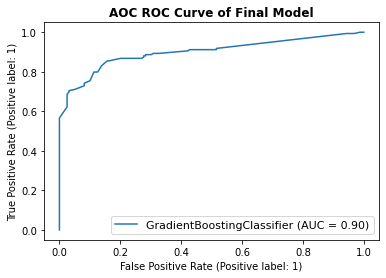

In [74]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gb,x_test,y_test)
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=12,fontweight='bold')

In [75]:
#Saving model 
import joblib
joblib.dump(gb,"Titanic.pkl")

['Titanic.pkl']